In [2]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scanpy as sc
import scanpy.external as sce
import matplotlib 
from matplotlib import rcParams
import matplotlib.font_manager
import matplotlib.font_manager as fm
import anndata
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import math
from scipy import ndimage
from scipy.spatial import distance_matrix
from matplotlib_venn import venn3, venn3_circles, venn2
import requests
sc.settings.verbosity = 3  

In [3]:
cortex_pt2 = pd.read_csv('23-0179-haikuo_li-flex-patient2-cortex_pixel_intensities_tic_normalized.csv',sep=',',skiprows=2)

In [4]:
medulla_pt2 = pd.read_csv('23-0179-haikuo_li-flex-patient2-medulla_pixel_intensities_tic_normalized.csv',sep=',',skiprows=2)
papilla_pt2 = pd.read_csv('23-0179-haikuo_li-flex-patient2-papilla_pixel_intensities_tic_normalized.csv',sep=',',skiprows=2)

In [5]:
cortex_pt3 = pd.read_csv('23-0179-haikuo_li-flex-patient3-cortex_pixel_intensities_tic_normalized.csv',sep=',',skiprows=2)
medulla_pt3 = pd.read_csv('23-0179-haikuo_li-flex-pt3-medulla_pixel_intensities_tic_normalized.csv',sep=',',skiprows=2)
papilla_pt3 = pd.read_csv('23-0179-haikuo_li-flex-pt3-papilla_pixel_intensities_tic_normalized.csv',sep=',',skiprows=2)

In [ ]:
#in the below analysis you should import MALDIpy packages accordingly
#here for simplicity, we may dissect some MALDIpy functions

In [7]:
cortex_pt2_obj = msi_data(cortex_pt2,scale=10)
medulla_pt2_obj = msi_data(medulla_pt2,scale=10)
papilla_pt2_obj = msi_data(papilla_pt2,scale=10)

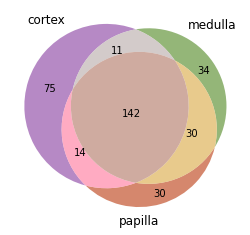

In [8]:
cortex_pt2_feat = set(cortex_pt2_obj.mzs)
medulla_pt2_feat = set(medulla_pt2_obj.mzs)
papilla_pt2_feat = set(papilla_pt2_obj.mzs)
venn3([cortex_pt2_feat, medulla_pt2_feat, papilla_pt2_feat], 
      set_labels = ('cortex', 'medulla','papilla'),
      set_colors=("#a46cb7","#7aa457","#cb6a49"), alpha = 0.8)

In [9]:
cortex_pt3_obj = msi_data(cortex_pt3,scale=10)
medulla_pt3_obj = msi_data(medulla_pt3,scale=10)
papilla_pt3_obj = msi_data(papilla_pt3,scale=10)

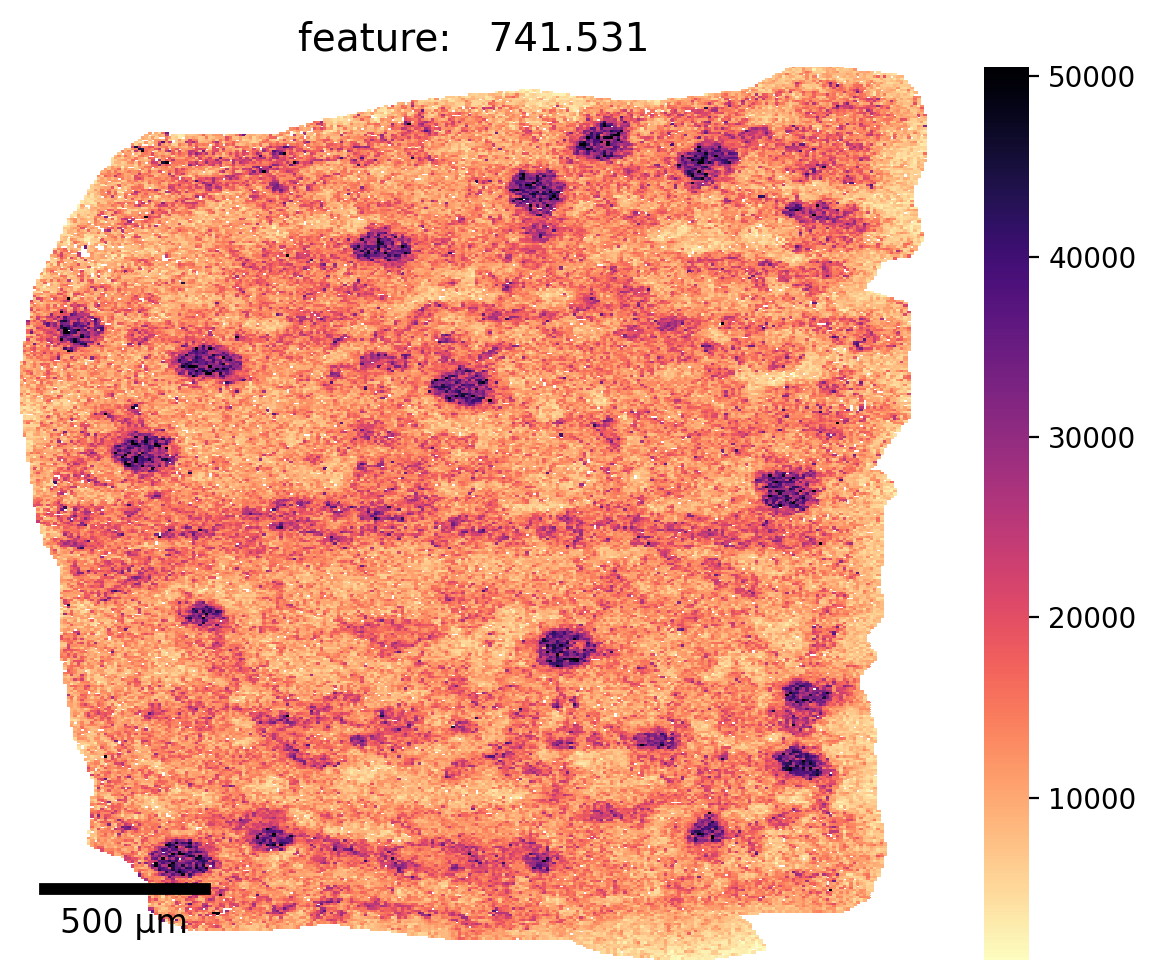

In [10]:
cortex_pt3_obj.plt(mz=741.530654593237,smooth=False, dpi = 200)

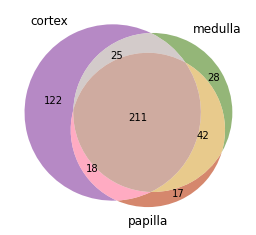

In [11]:
cortex_pt3_feat = set(cortex_pt3_obj.mzs)
medulla_pt3_feat = set(medulla_pt3_obj.mzs)
papilla_pt3_feat = set(papilla_pt3_obj.mzs)
venn3([cortex_pt3_feat, medulla_pt3_feat, papilla_pt3_feat], 
      set_labels = ('cortex', 'medulla','papilla'),
      set_colors=("#a46cb7","#7aa457","#cb6a49"), alpha = 0.8)

In [12]:
cortex_pt2_adata = cortex_pt2_obj.to_adata()
cortex_pt2_adata

AnnData object with n_obs × n_vars = 37233 × 242

In [13]:
sc.pp.calculate_qc_metrics(cortex_pt2_adata, percent_top=None, log1p=False, inplace=True)
cortex_pt2_adata

AnnData object with n_obs × n_vars = 37233 × 242
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [15]:
sc.pp.filter_cells(cortex_pt2_adata, min_counts=40000)
cortex_pt2_adata

filtered out 14676 cells that have less than 40000 counts


AnnData object with n_obs × n_vars = 22557 × 242
    obs: 'n_genes_by_counts', 'total_counts', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [16]:
sc.pp.filter_cells(cortex_pt2_adata, min_genes=30)
cortex_pt2_adata

filtered out 31 cells that have less than 30 genes expressed


AnnData object with n_obs × n_vars = 22526 × 242
    obs: 'n_genes_by_counts', 'total_counts', 'n_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [19]:
medulla_pt2_adata = medulla_pt2_obj.to_adata()
sc.pp.calculate_qc_metrics(medulla_pt2_adata, percent_top=None, log1p=False, inplace=True)
medulla_pt2_adata

AnnData object with n_obs × n_vars = 107562 × 217
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [21]:
sc.pp.filter_cells(medulla_pt2_adata, min_counts=40000)
sc.pp.filter_cells(medulla_pt2_adata, min_genes=30)
medulla_pt2_adata

filtered out 41715 cells that have less than 40000 counts
filtered out 117 cells that have less than 30 genes expressed


AnnData object with n_obs × n_vars = 65730 × 217
    obs: 'n_genes_by_counts', 'total_counts', 'n_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [23]:
papilla_pt2_adata = papilla_pt2_obj.to_adata()
sc.pp.calculate_qc_metrics(papilla_pt2_adata, percent_top=None, log1p=False, inplace=True)
papilla_pt2_adata

AnnData object with n_obs × n_vars = 139128 × 216
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [25]:
sc.pp.filter_cells(papilla_pt2_adata, min_counts=40000)
sc.pp.filter_cells(papilla_pt2_adata, min_genes=30)
papilla_pt2_adata

filtered out 60044 cells that have less than 40000 counts
filtered out 116 cells that have less than 30 genes expressed


AnnData object with n_obs × n_vars = 78968 × 216
    obs: 'n_genes_by_counts', 'total_counts', 'n_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [27]:
cortex_pt3_adata = cortex_pt3_obj.to_adata()
sc.pp.calculate_qc_metrics(cortex_pt3_adata, percent_top=None, log1p=False, inplace=True)
cortex_pt3_adata

AnnData object with n_obs × n_vars = 105986 × 376
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [29]:
sc.pp.filter_cells(cortex_pt3_adata, min_counts=40000)
sc.pp.filter_cells(cortex_pt3_adata, min_genes=30)
cortex_pt3_adata

filtered out 16479 cells that have less than 40000 counts
filtered out 132 cells that have less than 30 genes expressed


AnnData object with n_obs × n_vars = 89375 × 376
    obs: 'n_genes_by_counts', 'total_counts', 'n_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

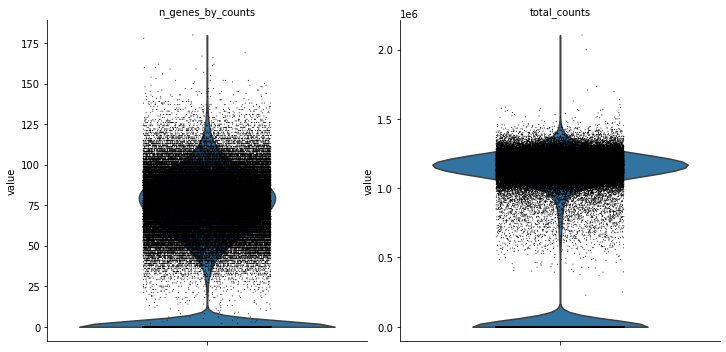

AnnData object with n_obs × n_vars = 120701 × 306
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [31]:
medulla_pt3_adata = medulla_pt3_obj.to_adata()
sc.pp.calculate_qc_metrics(medulla_pt3_adata, percent_top=None, log1p=False, inplace=True)
sc.pl.violin(medulla_pt3_adata, ['n_genes_by_counts', 'total_counts'],jitter=0.2, multi_panel=True)
medulla_pt3_adata

filtered out 33462 cells that have less than 40000 counts
filtered out 300 cells that have less than 30 genes expressed


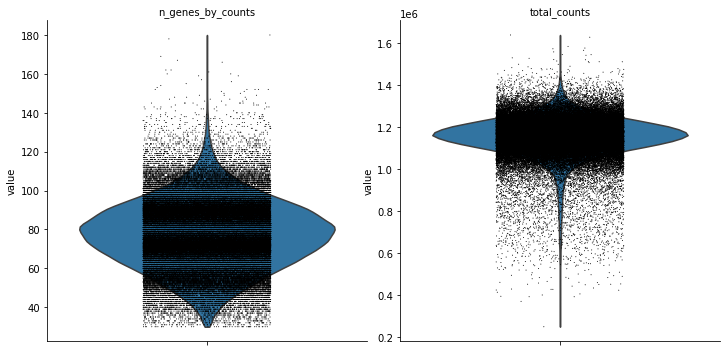

AnnData object with n_obs × n_vars = 86939 × 306
    obs: 'n_genes_by_counts', 'total_counts', 'n_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [32]:
sc.pp.filter_cells(medulla_pt3_adata, min_counts=40000)
sc.pp.filter_cells(medulla_pt3_adata, min_genes=30)
sc.pl.violin(medulla_pt3_adata, ['n_genes_by_counts', 'total_counts'],jitter=0.2, multi_panel=True)
medulla_pt3_adata

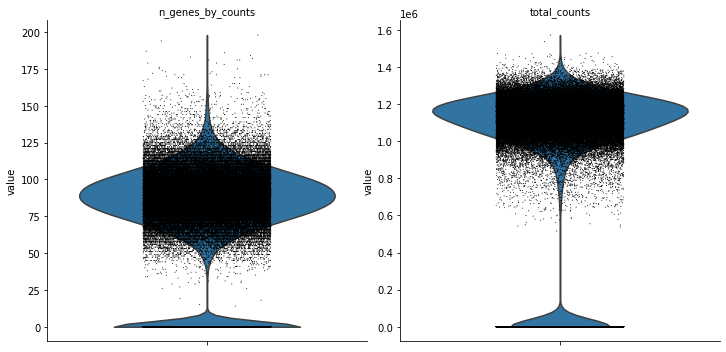

AnnData object with n_obs × n_vars = 74816 × 288
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [33]:
papilla_pt3_adata = papilla_pt3_obj.to_adata()
sc.pp.calculate_qc_metrics(papilla_pt3_adata, percent_top=None, log1p=False, inplace=True)
sc.pl.violin(papilla_pt3_adata, ['n_genes_by_counts', 'total_counts'],jitter=0.2, multi_panel=True)
papilla_pt3_adata

filtered out 10126 cells that have less than 40000 counts
filtered out 10 cells that have less than 30 genes expressed


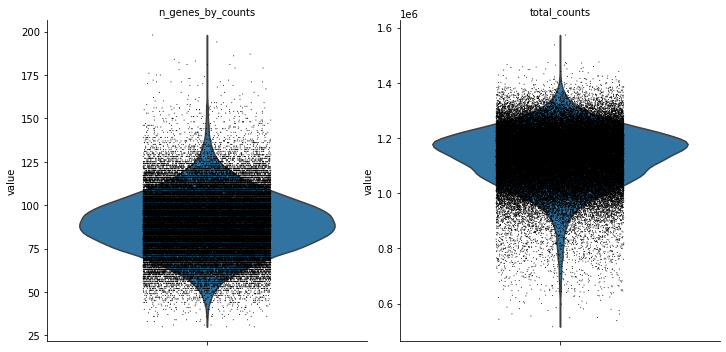

AnnData object with n_obs × n_vars = 64680 × 288
    obs: 'n_genes_by_counts', 'total_counts', 'n_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [34]:
sc.pp.filter_cells(papilla_pt3_adata, min_counts=40000)
sc.pp.filter_cells(papilla_pt3_adata, min_genes=30)
sc.pl.violin(papilla_pt3_adata, ['n_genes_by_counts', 'total_counts'],jitter=0.2, multi_panel=True)
papilla_pt3_adata

In [ ]:
#so we just confirmed this QC works for all 6 samples:
#sc.pp.filter_cells(adata, min_counts=40000)
#sc.pp.filter_cells(adata, min_genes=30)

In [35]:
df1 = cortex_pt2.set_index('mz').iloc[:,4:]
df1 = df1.add_suffix('_cortex_pt2')
print(df1.shape)
df2 = medulla_pt2.set_index('mz').iloc[:,4:]
df2 = df2.add_suffix('_medulla_pt2')
print(df2.shape)
df3 = papilla_pt2.set_index('mz').iloc[:,4:]
df3 = df3.add_suffix('_papilla_pt2')
print(df3.shape)

(242, 37233)
(217, 107562)
(216, 139128)


In [36]:
df4 = cortex_pt3.set_index('mz').iloc[:,4:]
df4 = df4.add_suffix('_cortex_pt3')
print(df4.shape)
df5 = medulla_pt3.set_index('mz').iloc[:,4:]
df5 = df5.add_suffix('_medulla_pt3')
print(df5.shape)
df6 = papilla_pt3.set_index('mz').iloc[:,4:]
df6 = df6.add_suffix('_papilla_pt3')
print(df6.shape)

(376, 105986)
(306, 120701)
(288, 74816)


In [37]:
pos_10_outer = pd.concat([df1,df2,df3,df4,df5,df6],axis=1,join="outer") #takes some time
pos_10_outer = pos_10_outer.fillna(0)
print(pos_10_outer.shape)

(588, 585426)


In [38]:
pos_10_outer_adata = anndata.AnnData(pos_10_outer.T.values)
pos_10_outer_adata.obs_names =  pos_10_outer.columns 
pos_10_outer_adata.var_names =  pos_10_outer.index.astype(str)

In [39]:
sc.pp.calculate_qc_metrics(pos_10_outer_adata, percent_top=None, log1p=False, inplace=True)
sc.pp.filter_cells(pos_10_outer_adata, min_counts=40000)
sc.pp.filter_cells(pos_10_outer_adata, min_genes=30)
pos_10_outer_adata

filtered out 176502 cells that have less than 40000 counts
filtered out 706 cells that have less than 30 genes expressed


AnnData object with n_obs × n_vars = 408218 × 588
    obs: 'n_genes_by_counts', 'total_counts', 'n_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [42]:
renal_region = []
patient_id = []
sample_id = []
for index, row in pos_10_outer_adata.obs.iterrows():
    renal_region.append(index.split('_')[2])
    patient_id.append(index.split('_')[3])
    sample_id.append(str(index.split('_')[2])+'_'+index.split('_')[3])

In [43]:
pos_10_outer_adata.obs['renal_region'] = renal_region
pos_10_outer_adata.obs['patient_id'] = patient_id
pos_10_outer_adata.obs['sample_id'] = sample_id

In [47]:
sc.pp.normalize_total(pos_10_outer_adata)
sc.pp.regress_out(pos_10_outer_adata, ['total_counts'], n_jobs=4)
sc.pp.scale(pos_10_outer_adata, max_value=10)
sc.tl.pca(pos_10_outer_adata, svd_solver='arpack')

normalizing counts per cell
    finished (0:00:00)
regressing out ['total_counts']
/home/users/hli/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'renal_region' as categorical
/home/users/hli/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'patient_id' as categorical
/home/users/hli/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Cat

In [48]:
pos_10_outer_adata

AnnData object with n_obs × n_vars = 408218 × 588
    obs: 'n_genes_by_counts', 'total_counts', 'n_counts', 'n_genes', 'renal_region', 'patient_id', 'sample_id'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

2023-03-22 13:22:59,613 - harmonypy - INFO - Iteration 1 of 10
2023-03-22 13:27:16,737 - harmonypy - INFO - Iteration 2 of 10
2023-03-22 13:31:23,572 - harmonypy - INFO - Iteration 3 of 10
2023-03-22 13:35:48,722 - harmonypy - INFO - Iteration 4 of 10
2023-03-22 13:40:05,567 - harmonypy - INFO - Iteration 5 of 10
2023-03-22 13:43:58,261 - harmonypy - INFO - Iteration 6 of 10
2023-03-22 13:48:29,164 - harmonypy - INFO - Iteration 7 of 10
2023-03-22 13:52:23,000 - harmonypy - INFO - Iteration 8 of 10
2023-03-22 13:56:04,412 - harmonypy - INFO - Converged after 8 iterations


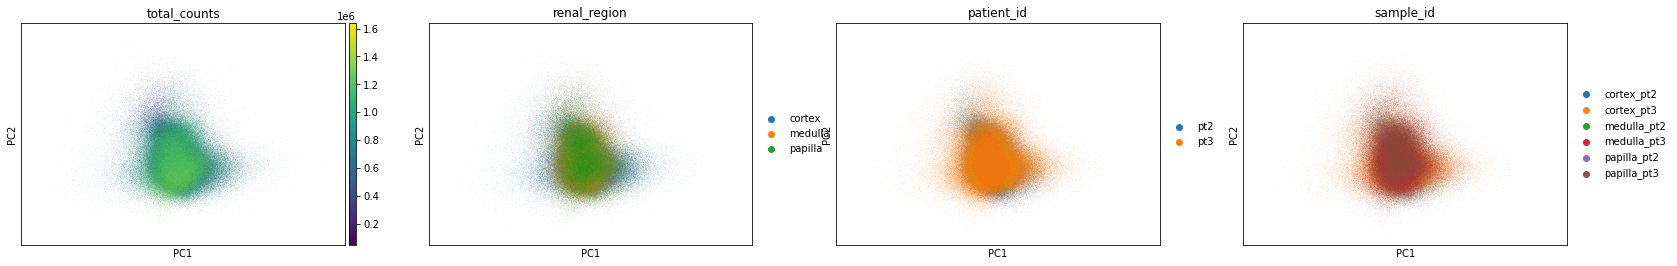

In [3]:
##then we assume there is batch effect between all 6 samples
sce.pp.harmony_integrate(pos_10_outer_adata, 'sample_id', theta=5)
pos_10_outer_adata.obsm['X_pca'] = pos_10_outer_adata.obsm['X_pca_harmony']
sc.pl.pca(pos_10_outer_adata,color=['total_counts','renal_region','patient_id','sample_id'])

In [ ]:
sc.pp.neighbors(pos_10_outer_adata, n_neighbors=30, n_pcs=20)
sc.tl.umap(pos_10_outer_adata, min_dist=0.2)

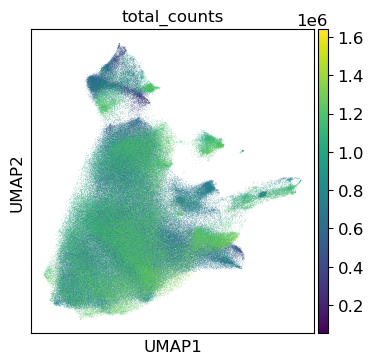

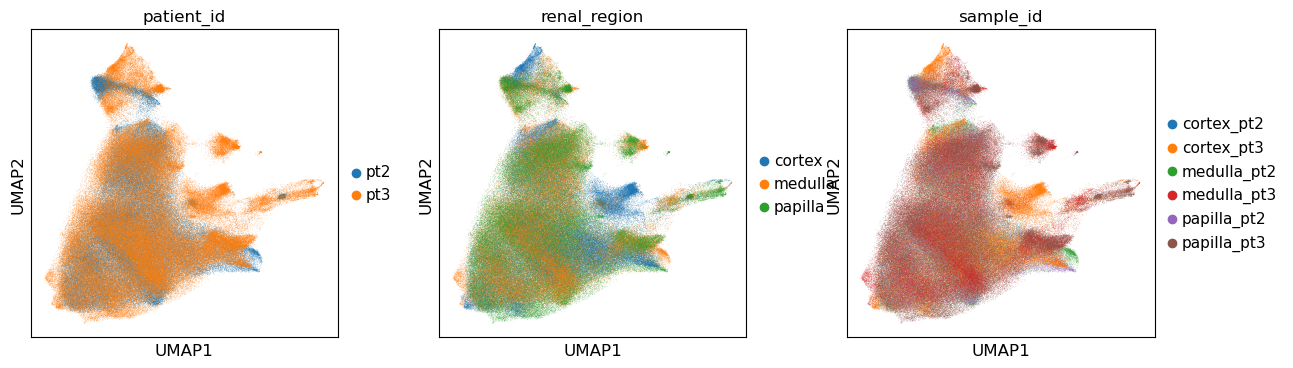

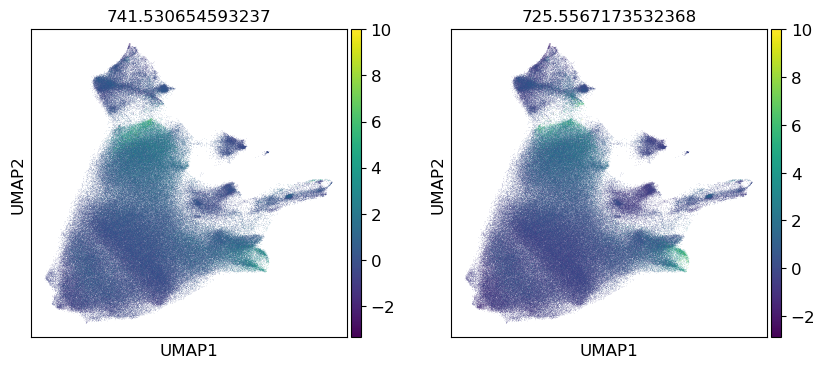

In [5]:
sc.settings.set_figure_params(dpi=100, facecolor='white',fontsize=12)
sc.pl.umap(pos_10_outer_adata, color=['total_counts'])
sc.pl.umap(pos_10_outer_adata, color=['patient_id','renal_region','sample_id'])
sc.pl.umap(pos_10_outer_adata, color=['741.530654593237','725.5567173532368'])